In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
# plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-10)
# m.bluemarble(scale=0.5);

In [3]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution='f',
#             width=2E6, height=2E6, 
#             lat_0=30.2672, lon_0=-97.7431,)
# m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
# x, y = m(-97.7431, 30.2672)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Austin', fontsize=12);

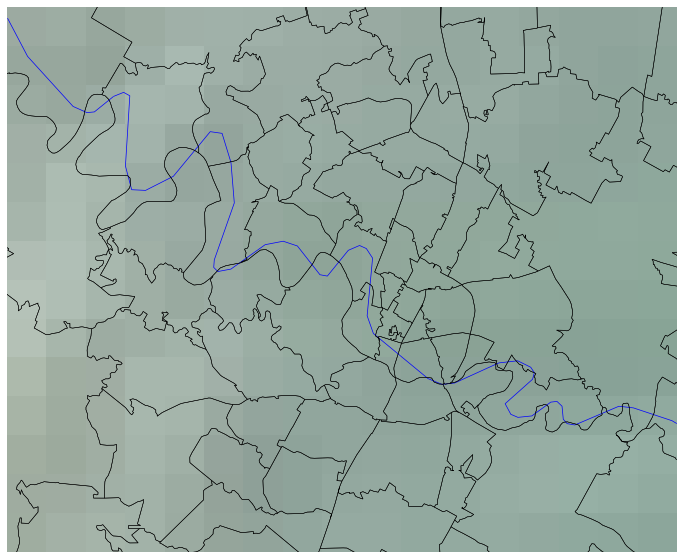

In [4]:
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib as mpl
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


# Read in population data.
colormap = plt.cm.Purples 

us_shape_file_dir = "../data/cb_2017_us_zcta510_500k"
os.chdir(us_shape_file_dir)

# Chicago coordinates.
lowerlon = -98.10 
upperlon = -97.47
lowerlat = 30.11
upperlat = 30.55

fig = plt.figure(figsize=(12,12))
m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )


m.drawrivers(color='b', linewidth=0.7)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
shp_info = m.readshapefile(os.path.basename(us_shape_file_dir), 'state')
plt.gca().axis("off")
plt.show()

In [5]:
# m = Basemap(
#     llcrnrlon=lowerlon,
#     llcrnrlat=lowerlat,
#     urcrnrlon=upperlon,
#     urcrnrlat=upperlat,
#     projection="lcc",
#     resolution="h",
#     lat_0=lowerlat,
#     lat_1=upperlat,
#     lon_0=lowerlon,
#     lon_1=upperlon
#     )

# shp_info = m.readshapefile(os.path.basename(us_shape_file_dir), 'state', drawbounds=True)

In [6]:
# m.state

In [7]:
df = pd.read_pickle('../../naive.pkl')
df.head()

,Zips,Distances,2019-02,Population
0,78704,27.854809,376,42117
1,78705,23.132023,331,31340
2,78701,25.760701,398,6841
3,78702,26.829830,370,21334
4,78703,22.736036,422,19690


In [8]:
X = df.values

In [9]:
cluster = KMeans(n_clusters=2)

In [10]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
df['labels'] = cluster.labels_

In [12]:
# zipdf = pd.DataFrame({
#     'shapes': [Polygon(np.array(shape), True) for shape in m.state],
#     'zip': [area['ZCTA5CE10'] for area in m.state_info]
# })

In [13]:
# zipdf['zip'] = zipdf['zip'].astype(int)

In [14]:
# zipdf = zipdf.merge(df, how='right', left_on='zip', right_on='Zips')

In [15]:
# zipdf

In [21]:
zipdf

,shapes,zip,Zips,Distances,2019-02,Population,labels
0,"Polygon37((33108.5, 25206.9) ...)",78757,78757,16.736562,299,21310,0
1,"Polygon31((38273.1, 19125.6) ...)",78721,78721,27.306999,279,11425,0
2,"Polygon58((24512.2, 10081.5) ...)",78745,78745,31.530699,232,55614,1
3,"Polygon31((34787.2, 21571.7) ...)",78751,78751,21.586368,364,14385,0
4,"Polygon37((34848.1, 16639.6) ...)",78702,78702,26.829830,370,21334,0
5,"Polygon43((33693.5, 11878) ...)",78741,78741,30.321045,227,44935,1
6,"Polygon63((28727.2, 15078.1) ...)",78704,78704,27.854809,376,42117,1
7,"Polygon131((22586.7, 22518.4) ...)",78746,78746,20.914299,316,26928,0
8,"Polygon34((35626.2, 19034.8) ...)",78722,78722,23.749207,339,5901,0
9,"Polygon41((33614.3, 25015.3) ...)",78756,78756,20.155697,338,7194,0


In [16]:
from matplotlib.patches import Polygon

In [23]:
print(m.state[0], m.state_info[0])

[(918716.1612794766, 353439.74171183683), (918930.398971892, 354091.9478044399), (918942.6104902107, 354430.9654985223), (918681.0798374413, 354868.0000850509), (919321.0578903125, 355289.733355233), (919585.9593718085, 355384.45742563147), (921285.8064655691, 355582.68710016354), (921512.0890854328, 355575.7542300568), (921880.0800397109, 355432.9150296954), (921636.3152815975, 355671.8022952238), (921869.6374487441, 355936.7570773344), (921845.9457737121, 356067.6239676852), (922091.9597215947, 356298.95549601776), (922241.958495453, 356099.64903570345), (922512.2779810696, 356125.99427467625), (922556.3377135936, 355915.0270965484), (922687.0080705513, 355993.1097446816), (922807.9758154557, 355837.28620510973), (923017.94562522, 355980.55888556544), (923072.1548845812, 356123.08505826775), (923252.0342883214, 355941.3925102321), (923298.4689534723, 355209.448486715), (923438.333113511, 355161.8787347136), (923628.280316408, 355531.5384643601), (923664.9760790147, 355810.057045595),

In [24]:
zipset = set(zipdf['Zips'])

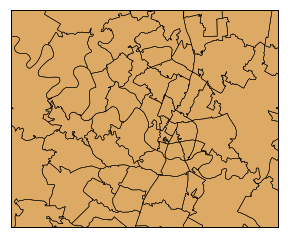

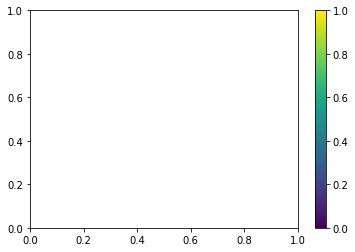

In [22]:
from matplotlib.collections import PatchCollection
import matplotlib.cm as cm
import matplotlib.colors as colors

m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')

m.readshapefile(os.path.basename(us_shape_file_dir), 'state', drawbounds=True)

zipdf = pd.DataFrame({
    'shapes': [Polygon(np.array(shape), True) for shape in m.state],
    'zip': [area['ZCTA5CE10'] for area in m.state_info]
})
zipdf['zip'] = zipdf['zip'].astype(int)
zipdf = zipdf.merge(df, how='right', left_on='zip', right_on='Zips')

# fig = plt.figure()
# ax = fig.add_subplot(111)

# cmap = plt.get_cmap('viridis')
# pc = PatchCollection(zipdf['shapes'], zorder=2)
# norm = colors.Normalize()

# pc.set_facecolor(cmap(norm(zipdf['labels'].values)))
# ax.add_collection(pc)

# cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
# cmapper.set_array(zipdf['labels'])
# plt.colorbar(cmapper)

# plt.show()



patches   = []

for info, shape in zip(m.state_info, m.state):
    if info['nombre'] == 'Selva':
        patches.append( Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

plt.show()

In [31]:
labdict = {k: v for k, v in zip(zipdf.Zips, zipdf.labels)}

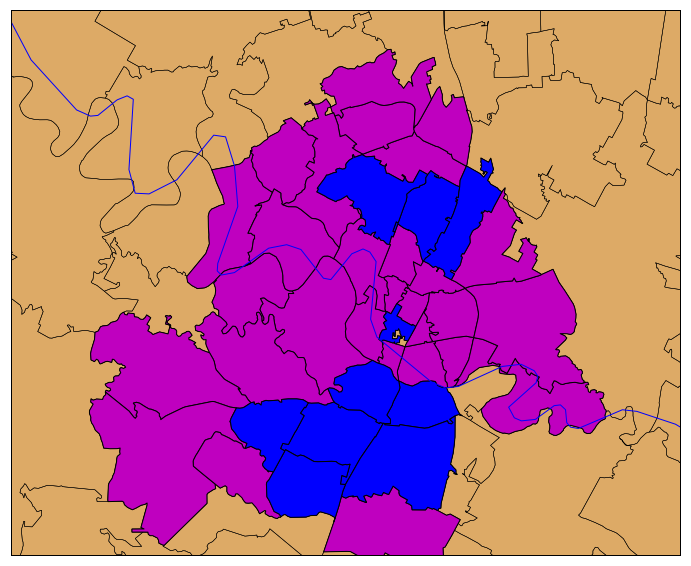

In [36]:
from matplotlib.patches import PathPatch
import numpy as np

fig     = plt.figure(figsize=(12,12))
ax      = fig.add_subplot(111)

m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )


m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')

m.readshapefile(os.path.basename(us_shape_file_dir), 'state', drawbounds=True)

clustone = []
clusttwo = []

for info, shape in zip(m.state_info, m.state):
    if int(info['ZCTA5CE10']) in zipset and labdict[int(info['ZCTA5CE10'])] == 0:
        clustone.append( Polygon(np.array(shape), True) )
    if int(info['ZCTA5CE10']) in zipset and labdict[int(info['ZCTA5CE10'])] == 1:
        clusttwo.append( Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(clustone, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))
ax.add_collection(PatchCollection(clusttwo, facecolor= 'b', edgecolor='k', linewidths=1., zorder=2))
m.drawrivers(linewidth=1, color='b')

plt.show()

In [38]:
cluster = KMeans(n_clusters=3)
cluster.fit(X)
labels2 = cluster.labels_
df['labels2'] = labels2
zipdf = zipdf.merge(df, how='right', left_on='zip', right_on='Zips')



In [39]:
zipdf.head()

,shapes,zip,Zips_x,Distances_x,2019-02_x,Population_x,labels_x,Zips_y,Distances_y,2019-02_y,Population_y,labels_y,labels2
0,"Polygon37((33108.5, 25206.9) ...)",78757,78757,16.736562,299,21310,0,78757,16.736562,299,21310,0,0
1,"Polygon31((38273.1, 19125.6) ...)",78721,78721,27.306999,279,11425,0,78721,27.306999,279,11425,0,2
2,"Polygon58((24512.2, 10081.5) ...)",78745,78745,31.530699,232,55614,1,78745,31.530699,232,55614,1,1
3,"Polygon31((34787.2, 21571.7) ...)",78751,78751,21.586368,364,14385,0,78751,21.586368,364,14385,0,2
4,"Polygon37((34848.1, 16639.6) ...)",78702,78702,26.829830,370,21334,0,78702,26.829830,370,21334,0,0


In [ ]:


labdict2 = {k: v for k, v in zip(zipdf.Zips, zipdf.labels2)}

fig     = plt.figure(figsize=(12,12))
ax      = fig.add_subplot(111)

m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )


m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')

m.readshapefile(os.path.basename(us_shape_file_dir), 'state', drawbounds=True)

clustone = []
clusttwo = []
clustthree = []

for info, shape in zip(m.state_info, m.state):
    if int(info['ZCTA5CE10']) in zipset and labdict2[int(info['ZCTA5CE10'])] == 0:
        clustone.append( Polygon(np.array(shape), True) )
    if int(info['ZCTA5CE10']) in zipset and labdict2[int(info['ZCTA5CE10'])] == 1:
        clusttwo.append( Polygon(np.array(shape), True) )
        if int(info['ZCTA5CE10']) in zipset and labdict2[int(info['ZCTA5CE10'])] == 2:
        clustthree.append( Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(clustone, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))
ax.add_collection(PatchCollection(clusttwo, facecolor= 'b', edgecolor='k', linewidths=1., zorder=2))
ax.add_collection(PatchCollection(clustthree, facecolor= 'y', edgecolor='k', linewidths=1., zorder=2))
m.drawrivers(linewidth=1, color='b')

plt.show()

array([[7.87040000e+04, 2.78548091e+01, 3.76000000e+02, 4.21170000e+04],
       [7.87050000e+04, 2.31320227e+01, 3.31000000e+02, 3.13400000e+04],
       [7.87010000e+04, 2.57607008e+01, 3.98000000e+02, 6.84100000e+03],
       [7.87020000e+04, 2.68298303e+01, 3.70000000e+02, 2.13340000e+04],
       [7.87030000e+04, 2.27360356e+01, 4.22000000e+02, 1.96900000e+04],
       [7.87170000e+04, 7.92569308e-01, 1.44000000e+02, 2.25380000e+04],
       [7.87210000e+04, 2.73069994e+01, 2.79000000e+02, 1.14250000e+04],
       [7.87220000e+04, 2.37492069e+01, 3.39000000e+02, 5.90100000e+03],
       [7.87230000e+04, 2.31692373e+01, 2.52000000e+02, 2.83300000e+04],
       [7.87280000e+04, 7.00612471e+00, 1.61000000e+02, 2.02990000e+04],
       [7.87290000e+04, 5.11879432e+00, 1.56000000e+02, 2.71080000e+04],
       [7.87300000e+04, 1.31145957e+01, 2.24000000e+02, 7.95500000e+03],
       [7.87310000e+04, 1.67118318e+01, 2.71000000e+02, 2.46140000e+04],
       [7.87240000e+04, 2.59696391e+01, 1.52000000e